In [2]:
#Test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def cost(theta_val, x_val, y_val):
    theta_val = theta_val.reshape((-1,1))
    h = sigmoid(theta_val.T @ x_val.T).T
    pos_cost = - y_val * np.log(h)
    neg_cost = - (1-y_val) * np.log(1-h)
    cost = pos_cost + neg_cost
    return np.array(np.sum(cost)/99).reshape((1,1))

def grad_cost(theta_val, x_val, y_val):
    theta_val = theta_val.reshape((-1,1))
    err = sigmoid(theta_val.T @ x_val.T).T-y_val
    count = y_val.shape[0]
    return ((x_val.T @ err)/count).flatten()
    
def predict(theta_val,exam1,exam2):
    res = theta_val.T @ np.array([[1,exam1,exam2]]).T  
    return sigmoid(res).reshape((-1,1))

def plot_result(thetax=False):
    if np.all(thetax):
        a = np.linspace(0,100,99)
        b = -(thetax[0]+thetax[1]*a)/thetax[2]
        plt.plot(a,b)
    plt.scatter(x[:,0][y[:,0]==1],x[:,1][y[:,0]==1],marker='+',c='blue')
    plt.scatter(x[:,0][y[:,0]==0],x[:,1][y[:,0]==0],marker='o',c='yellow',edgecolors='black')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted','Not Admitted'],loc=1)
    plt.xlim(axislim[:2])
    plt.ylim(axislim[-2:])

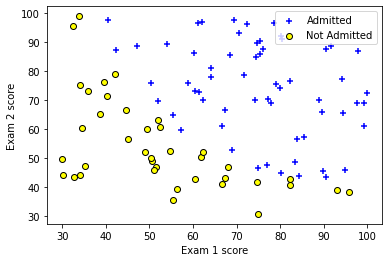

In [102]:
data = pd.read_csv('ex2data1.txt').to_numpy()
x = data[:,:-1]
y = data[:,-1].reshape((-1,1))
axislim = [26.570370679186794,103.31630956443244,27.18995460888381,102.28274436760242]
plot_result()
x_a = np.c_[[1]*99,x]

# Gradient Descent (without Regularized)

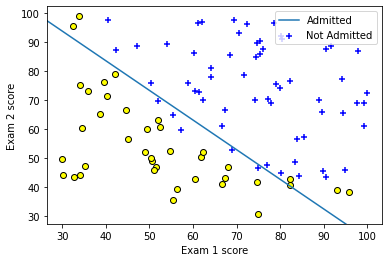

In [318]:
pretrained = True
if pretrained:
    loop = 1000
    theta0 = np.array([-18.91663702,0.15566983,0.15189705])
else:
    loop = 1000000
    theta0 = np.array([1,1,1]).T
gradient = 1e-3
cst = []
for _ in range(loop):
    theta0 = theta0 - (gradient * grad_cost(theta0,x_a,y))
    #cst.append(cost(y,theta0,x_a))
plot_result(theta0)

# Gradient Descent (with Regularized)

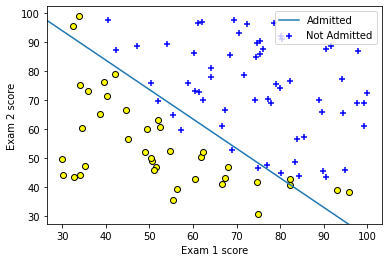

In [332]:
def grad_cost2(theta_val,x_val,y_val,lamb=1):
    theta_val = theta_val.reshape((-1,1))
    err = sigmoid(theta_val.T @ x_val.T).T-y_val
    count = y_val.shape[0]
    return ((x_a.T @ err+lamb*(np.c_[0,theta_val[1:].T]).T)/count).flatten()

pretrained = True
if pretrained:
    loop = 1000
    theta1 = np.array([-24.58935177,0.20109821,0.19757058])
else:
    loop = 1000000
    theta1 = np.array([1,1,1])
gradient = 1e-3 

for _ in range(loop):
    theta1 = theta1 - (gradient * grad_cost2(theta1,x_a,y,10))
plot_result(theta1)

# Optimize using sklearn.linear_model

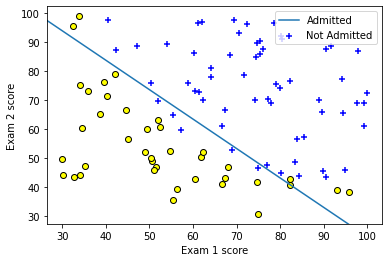

In [334]:
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegression()
clf.fit(x, y.flatten())
w0 = clf.intercept_[0]
w1, w2 = clf.coef_.T
theta2 = np.c_[w0,w1,w2].T
plot_result(theta2)

# Optimize using scipy.optimzie.minimize

In [341]:
theta3 = np.array([[0,0,0]]).T
theta4 = np.array([[0,0,0]]).T
from scipy import optimize

optimizer3 = optimize.minimize(fun=cost, x0=theta3,args = (x_a,y), method ='TNC', jac=grad_cost)
theta3 = optimizer3.x
optimizer4 = optimize.minimize(fun=cost, x0=theta4,args = (x_a,y), method ='TNC', jac=None)
theta4 = optimizer4.x


     fun: 0.2045573999525329
     jac: array([ 2.36531632e-06, -5.70784432e-05,  1.86337654e-04])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 48
     nit: 21
  status: 1
 success: True
       x: array([-24.86556124,   0.20334343,   0.19985039])      fun: 0.2046483559875592
     jac: array([-0.00089509, -0.11206943, -0.01026213])
 message: 'Max. number of function evaluations reached'
    nfev: 404
     nit: 19
  status: 3
 success: False
       x: array([-24.59611386,   0.19963887,   0.19904387])


# Validating the Result

In [337]:
print(predict(theta0,45,85)) # Gradient descent 
print(predict(theta1,45,85)) # Gradient descent w/ Regularization
print(predict(theta2,45,85)) # Optimize using sklearn
print(predict(theta3,45,85)) # Optimize uisng scipy.optimize.minimize 
print(predict(theta4,45,85)) # Optimize uisng scipy.optimize.minimize without partial function given

[[0.73103284]]
[[0.7779149]]
[[0.78017464]]
[[0.78111504]]
